#**Machine Learning for Credit Risk Analysis - ID/X Partners Project-Based Internship**


A lending company, sought to enhance their risk assessment capabilities by developing a predictive model capable of assessing creditworthiness. The model would leverage a dataset comprising accepted and rejected loan applications to identify patterns and correlations indicative of credit risk. The project aimed to provide a comprehensive solution encompassing model development, evaluation, and visual representation of findings, facilitating informed decision-making for the lending company.

The timely development of this predictive model was crucial for the lending company to mitigate financial losses arising from loan defaults. By accurately identifying high-risk borrowers, the company could implement effective risk management strategies, optimize lending decisions, and improve overall profitability. Additionally, through Exploratory Data Analysis (EDA), we can
uncover patterns and trends within the data that reveal deeper insights into the factors influencing creditworthiness.

**Project for Data Scientist Project-Based Internship by ID/X Partners**

**By Giselle Halim**

### Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 75)

### Sneak Peak Data

In [ ]:
#Looking at the first 5 rows of the dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Looking at the last 5 rows of the dataset
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [ ]:
#How many rows and columns in the dataset?
df.shape

(466285, 75)

In [ ]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Handling Missing Values

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [ ]:
#Deleting unused columns
dropped = ['id', 'member_id', 'Unnamed: 0', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title', 'zip_code',
           'next_pymnt_d', 'last_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'recoveries',
           'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
           'mths_since_last_major_derog', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
           'out_prncp_inv', 'total_rev_hi_lim']

df.drop(columns = dropped, axis=1, inplace=True)

In [ ]:
#Deleting all columns with null value above 90%
df = df.loc[:, df.isnull().mean() < .9]

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,27588
emp_length,21008
home_ownership,0
annual_inc,4


## Data Preprocessing

###Loan Status

To streamline the model's learning process and enhance prediction accuracy, the loan_status variable was categorized into two distinct classes.

* 0: Good (loans with timely payments or specific exemptions)
* 1: Bad (loans with overdue payments exceeding 30 days).

By reducing the number of categories, the model could focus on identifying the most significant factors influencing credit worthiness, minimizing the risk of
overfitting and improving overall predictive performance.

The 'Current' loan status category is excluded from the analysis as these loans are ongoing and cannot be predicted. The 'Late (16-30 days)' category is treated as a good loan since loans are typically not classified as bad until they surpass 30 days overdue.

In [ ]:
df.loan_status.value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [ ]:
good_loan = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16-30 days)']
df['loan_stats'] = np.where(df['loan_status'].isin(good_loan), 0, 1)

In [ ]:
df = df.loc[~df['loan_status'].isin(['Current'])].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242059 entries, 0 to 242058
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   242059 non-null  int64  
 1   term                        242059 non-null  object 
 2   int_rate                    242059 non-null  float64
 3   installment                 242059 non-null  float64
 4   grade                       242059 non-null  object 
 5   sub_grade                   242059 non-null  object 
 6   emp_title                   228448 non-null  object 
 7   emp_length                  232732 non-null  object 
 8   home_ownership              242059 non-null  object 
 9   annual_inc                  242055 non-null  float64
 10  verification_status         242059 non-null  object 
 11  issue_d                     242059 non-null  object 
 12  loan_status                 242059 non-null  object 
 13  pymnt_plan    

In [ ]:
df.drop('loan_status', axis=1, inplace=True)

### Categorical Columns with 1 Unique Value

In [ ]:
df['policy_code'].unique()

array([1])

In [ ]:
#Policy code only has 1 unique value
df.drop('policy_code', axis=1, inplace=True)

In [ ]:
#Application type only has 1 unique value
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [ ]:
df.drop('application_type', axis=1, inplace=True)

### Cleaning Categorical Columns

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [ ]:
#Cleaning emp_length values
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = df['emp_length'].str.replace('+', '')
df['emp_length'] = df['emp_length'].astype(float)

In [ ]:
#Converting emp_title values to uppercase
df['emp_title'] = df['emp_title'].str.upper()

In [ ]:
#Cleaning term values
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

In [ ]:
#Looking at values in other columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts()[:20])
    print('\n')

grade
B    72920
C    61942
A    39676
D    39428
E    18528
F     7532
G     2033
Name: count, dtype: int64


sub_grade
B3    17528
B4    16283
C1    14162
B2    14063
B5    13562
C2    13538
C3    12125
B1    11484
C4    11433
A5    11167
C5    10684
A4    10426
D1     9671
D2     8877
D3     7776
D4     7174
A3     6778
D5     5930
A2     5792
A1     5513
Name: count, dtype: int64


emp_title
MANAGER               2243
TEACHER               2070
SUPERVISOR            1057
REGISTERED NURSE      1035
SALES                  858
DRIVER                 847
RN                     812
US ARMY                702
PROJECT MANAGER        677
OFFICE MANAGER         656
OWNER                  590
GENERAL MANAGER        538
TRUCK DRIVER           517
BANK OF AMERICA        485
ENGINEER               470
DIRECTOR               452
POLICE OFFICER         423
STORE MANAGER          381
OPERATIONS MANAGER     375
SALES MANAGER          352
Name: count, dtype: int64


home_ownership
MORTGAGE    118837

In [ ]:
#Dominated by a single value
df.drop('pymnt_plan', axis=1, inplace=True)

###Date

####earliest_cr_line

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['mths_since_earliest_cr_line'] = (pd.to_datetime('2016-12-31') - df['earliest_cr_line']).dt.days // 30
df['mths_since_earliest_cr_line'].head()

,mths_since_earliest_cr_line
0,389.0
1,216.0
2,184.0
3,254.0
4,148.0


In [ ]:
df['mths_since_earliest_cr_line'].describe()

,mths_since_earliest_cr_line
count,242030.000000
mean,228.465095
std,91.140469
min,-633.000000
25%,174.000000
50%,215.000000
75%,271.000000
max,584.000000


In [ ]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [ ]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

####issue_d

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'].head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


In [ ]:
df['mths_since_issue_d'] = (pd.to_datetime('2016-12-31') - df['issue_d']).dt.days // 30
df['mths_since_issue_d'].head()

,mths_since_issue_d
0,61
1,61
2,61
3,61
4,61


In [ ]:
df['mths_since_issue_d'].describe()

,mths_since_issue_d
count,242059.000000
mean,46.595925
std,16.666741
min,25.000000
25%,34.000000
50%,43.000000
75%,54.000000
max,116.000000


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_stats,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,36.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.00,171.62,0.0,0.0,NaN,NaN,0,389.0,61
1,2500,60.0,15.27,59.83,C,C4,RYDER,0.0,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.00,119.66,0.0,0.0,NaN,NaN,1,216.0,61
2,2400,36.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.00,649.91,0.0,0.0,NaN,NaN,0,184.0,61
3,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,16.97,357.48,0.0,0.0,NaN,NaN,0,254.0,61
4,5000,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3.0,RENT,36000.0,Source Verified,2011-12-01,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.00,161.03,0.0,0.0,NaN,NaN,0,148.0,61


#### issue_year

In [ ]:
#Extract the year from 'issue_d'
df['issue_year'] = pd.to_datetime(df['issue_d']).dt.year

## Exploratory Data Analysis

In [ ]:
#Describing the dataset
df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_stats,mths_since_earliest_cr_line,mths_since_issue_d,issue_year
count,242059.000000,242059.000000,242059.000000,242059.000000,232732.000000,2.420550e+05,242059,242059.000000,242030.000000,242030.000000,242030.000000,242030.000000,2.420590e+05,241825.000000,242030.000000,242059.000000,242059.000000,242059.000000,241914.000000,242030.000000,1.753700e+05,1.753700e+05,242059.000000,242030.000000,242059.000000,242059.000000
mean,13520.553254,41.315497,13.881078,417.842774,5.792547,7.195602e+04,2013-02-15 14:15:09.804634368,16.470368,0.250469,0.905875,10.869520,0.135574,1.522950e+04,55.092836,24.821163,492.075000,0.976576,5593.482265,0.006035,0.002900,2.012850e+02,1.364532e+05,0.210560,230.992232,46.595925,2012.641881
min,500.000000,36.000000,5.420000,15.670000,0.000000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,62.000000,25.000000,2007.000000
25%,7300.000000,36.000000,10.990000,240.170000,2.000000,4.500000e+04,2012-07-01 00:00:00,10.740000,0.000000,0.000000,7.000000,0.000000,5.921000e+03,37.400000,16.000000,0.000000,0.000000,412.790000,0.000000,0.000000,0.000000e+00,2.796200e+04,0.000000,174.000000,34.000000,2012.000000
50%,12000.000000,36.000000,13.670000,365.300000,6.000000,6.150000e+04,2013-06-01 00:00:00,16.180000,0.000000,1.000000,10.000000,0.000000,1.099600e+04,56.800000,23.000000,0.000000,0.000000,2787.440000,0.000000,0.000000,0.000000e+00,7.898250e+04,0.000000,215.000000,43.000000,2013.000000
75%,18125.000000,36.000000,16.770000,546.690000,10.000000,8.600000e+04,2014-03-01 00:00:00,21.920000,0.000000,1.000000,13.000000,0.000000,1.907900e+04,74.600000,32.000000,0.000000,0.000000,8698.535000,0.000000,0.000000,0.000000e+00,2.061448e+05,0.000000,272.000000,54.000000,2014.000000
max,35000.000000,60.000000,26.060000,1408.130000,10.000000,7.141778e+06,2014-12-01 00:00:00,39.990000,29.000000,33.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,358.680000,36234.440000,6.000000,5.000000,9.152545e+06,8.000078e+06,1.000000,584.000000,116.000000,2014.000000
std,8078.730959,9.965833,4.386245,243.984753,3.615471,5.507293e+04,NaN,7.707138,0.739738,1.172257,4.835813,0.423187,1.915964e+04,24.665256,11.669190,2649.388902,6.483973,6827.611364,0.084301,0.058489,2.191743e+04,1.502794e+05,0.407707,84.388009,16.666741,1.369248


In [ ]:
# Looking at categorical columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts())
    print('\n')

grade
B    72920
C    61942
A    39676
D    39428
E    18528
F     7532
G     2033
Name: count, dtype: int64


sub_grade
B3    17528
B4    16283
C1    14162
B2    14063
B5    13562
C2    13538
C3    12125
B1    11484
C4    11433
A5    11167
C5    10684
A4    10426
D1     9671
D2     8877
D3     7776
D4     7174
A3     6778
D5     5930
A2     5792
A1     5513
E1     4475
E2     4446
E3     3638
E4     3219
E5     2750
F1     2163
F2     1722
F3     1549
F4     1167
F5      931
G1      681
G2      496
G3      340
G4      270
G5      246
Name: count, dtype: int64


emp_title
MANAGER                               2243
TEACHER                               2070
SUPERVISOR                            1057
REGISTERED NURSE                      1035
SALES                                  858
                                      ... 
FRITCH FUEL                              1
DOMINION ENERGY                          1
EINSTEIN BROS. BAGELS                    1
FRANKLIN ADULT HEALTHCARE SERVICES

### Loan Status

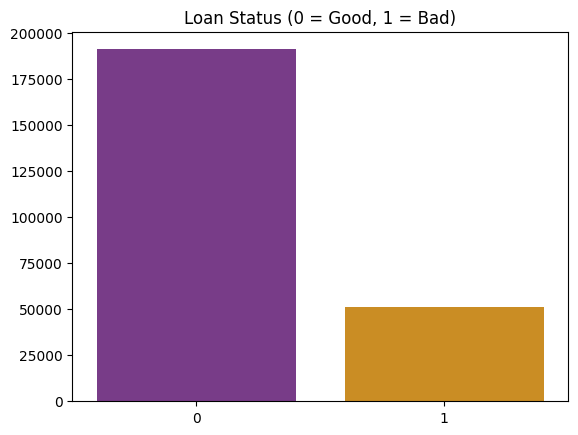

In [ ]:
data_plot  = df['loan_stats'].value_counts().to_list()
label_plot = df['loan_stats'].value_counts().index.to_list()

title = 'Loan Status (0 = Good, 1 = Bad)'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [ ]:
df['loan_stats'].value_counts()

,count
loan_stats,
0,191091
1,50968


In [ ]:
# Average numerical columns based on loan status
df.groupby(by = 'loan_stats').mean(numeric_only=True)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,issue_year
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,
0,13233.481169,40.452706,13.323055,411.466983,5.785310,73690.303244,15.983221,0.240599,0.872091,10.808264,0.132452,15251.437854,53.896528,24.960035,214.832708,0.471286,6962.804087,0.005645,0.002617,219.671307,142629.548407,232.397891,47.306085,2012.583036
1,14596.853908,44.550306,15.973236,441.747112,5.820265,65453.939742,18.296797,0.287472,1.032532,11.099166,0.147278,15147.244349,59.579049,24.300540,1531.521454,2.871024,459.573217,0.007499,0.003964,139.159854,115584.006467,225.722496,43.933370,2012.862502


* The data shows a skewed distribution where significantly more borrowers have good credit than bad
credit, which may lead to biased model predictions if not addressed through techniques like resampling.
* There are 191,091 good loans compared to 50,968 bad loans. The percentage of bad loans to the total
number of loans is approximately 21.06%. This is quite high and a potential red flag under most normal
conditions. It may indicate significant financial stress or a risky lending environment.
* The average loan amount is around $13-14k with an interest rate of 13-15%. Bad loans tend to have a
higher average loan amount than good loans, possibly indicating overborrowing by high-risk borrowers.

### Issue Year vs Loan Status

In [ ]:
grouped_data = df.groupby('issue_year')['loan_stats'].value_counts().unstack()

default_rate = grouped_data[1] / (grouped_data[0] + grouped_data[1])
default_rate.name = 'default_rate'

results = pd.concat([grouped_data, default_rate], axis=1)

print(results)

                0      1  default_rate
issue_year                            
2007          445    158      0.262023
2008         1897    496      0.207271
2009         4558    723      0.136906
2010        10771   1759      0.140383
2011        16509   3259      0.164862
2012        41589   8334      0.166937
2013        57693  16798      0.225504
2014        57629  19441      0.252251


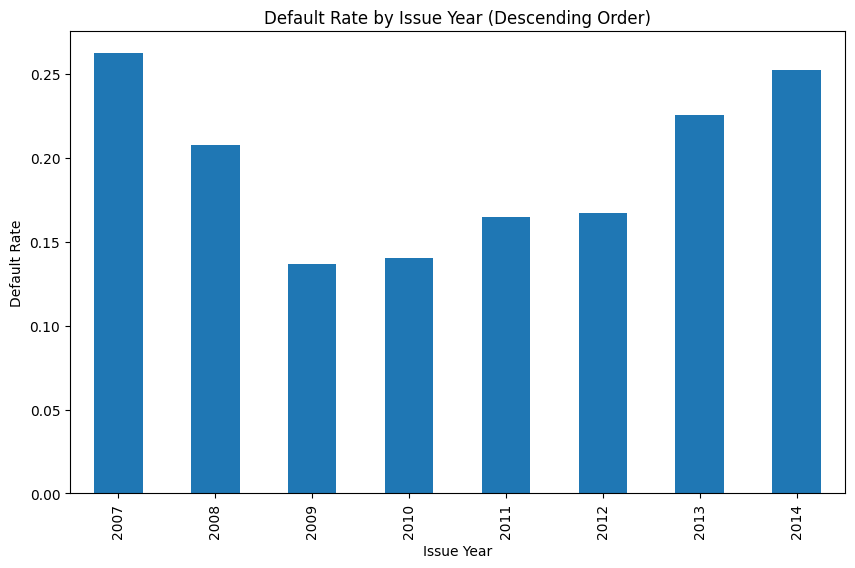

In [ ]:
results['default_rate'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Issue Year')
plt.ylabel('Default Rate')
plt.title('Default Rate by Issue Year (Descending Order)')
plt.show()

The high default rate of 26% in 2007 can likely be attributed to the onset of the global financial crisis, which started in that year. The housing market collapse, widespread foreclosures, and tightening credit conditions caused significant financial strain, leading to a spike in defaults. In 2008, the default rate
decreased to 20.7%, which, while still high, reflects the ongoing effects of the crisis as governments and financial institutions implemented emergency measures, including bailouts and loan modifications, to stabilize the economy.

From 2009 to 2012, the default rate continued to decrease to between 13-16%. This decline likely reflects the gradual economic recovery following the recession, as markets stabilized and job growth slowly improved. Additionally, lending practices became stricter, reducing the number of high-risk loans and improving overall loan quality. The Dodd-Frank Act and other post-crisis financial regulations may have played a key role in reducing risky lending, leading to a much healthier credit environment.

However, the rate rose again to 22-25% during 2013-2014. This increase can be attributed to heightened economic uncertainty, driven by the U.S. debt ceiling crisis, global market volatility, and the Federal Reserve's tapering of its quantitative easing program. The political standoff over the debt ceiling created
fears of a government default, while concerns about slower growth in emerging markets and the Eurozone debt crisis intensified market instability. Additionally, the Fed's decision to reduce its bond-buying program led to rising interest rates, further straining borrowers. These combined factors made it difficult for
businesses and borrowers to manage financial pressures, resulting in higher default rates during this period.

### Employee Title + Length

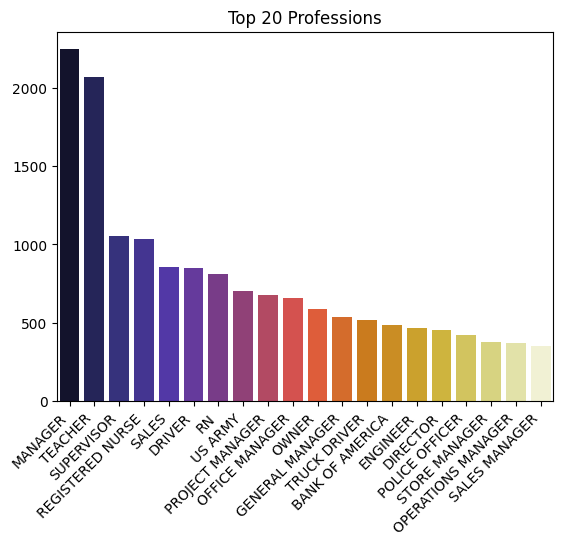

In [ ]:
data_plot  = df['emp_title'].value_counts()[:20].to_list()
label_plot = df['emp_title'].value_counts()[:20].index.to_list()

title = 'Top 20 Professions'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot_title = plt.title(title)
plt.show()

In [ ]:
df['emp_title'].value_counts()[:20]

,count
emp_title,
MANAGER,2243
TEACHER,2070
SUPERVISOR,1057
REGISTERED NURSE,1035
SALES,858
DRIVER,847
RN,812
US ARMY,702
PROJECT MANAGER,677


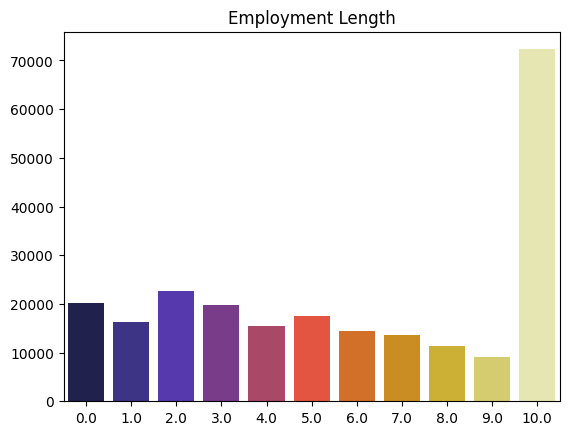

In [ ]:
data_plot  = df['emp_length'].value_counts().to_list()
label_plot = df['emp_length'].value_counts().index.to_list()

title = 'Employment Length'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [ ]:
df['emp_length'].value_counts()

,count
emp_length,
10.0,72295
2.0,22642
0.0,20234
3.0,19680
5.0,17497
1.0,16280
4.0,15563
6.0,14496
7.0,13652


In [ ]:
top_20_emp_title_0 = df[df['loan_stats'] == 0]['emp_title'].value_counts()[:20]
print("Top 20 'emp_title' for loan_stats 0:\n", top_20_emp_title_0)

top_20_emp_title_1 = df[df['loan_stats'] == 1]['emp_title'].value_counts()[:20]
print("\nTop 20 'emp_title' for loan_stats 1:\n", top_20_emp_title_1)

Top 20 'emp_title' for loan_stats 0:
 emp_title
MANAGER               1596
TEACHER               1591
REGISTERED NURSE       782
SUPERVISOR             764
RN                     626
SALES                  615
DRIVER                 564
US ARMY                557
PROJECT MANAGER        547
OFFICE MANAGER         511
BANK OF AMERICA        387
GENERAL MANAGER        382
ENGINEER               382
OWNER                  377
DIRECTOR               365
POLICE OFFICER         350
TRUCK DRIVER           346
VICE PRESIDENT         302
OPERATIONS MANAGER     293
STORE MANAGER          273
Name: count, dtype: int64

Top 20 'emp_title' for loan_stats 1:
 emp_title
MANAGER              647
TEACHER              479
SUPERVISOR           293
DRIVER               283
REGISTERED NURSE     253
SALES                243
OWNER                213
RN                   186
TRUCK DRIVER         171
GENERAL MANAGER      156
OFFICE MANAGER       145
US ARMY              145
PROJECT MANAGER      130
STORE MANAGE

Managers and teachers are among the most frequent borrowers and are more likely to default on loans. This may stem from job-related financial strain, such as underpaid work or responsibilities requiring personal financial contributions (in the case of teachers), or from overextension of credit and debt accumulation due to higher living expenses or lifestyle demands for managers.

The average borrower has been employed for 10 or
more years, but this does not necessarily indicate
lower credit risk. Despite long work histories, other
factors may influence default risk.

### States vs Loan Status

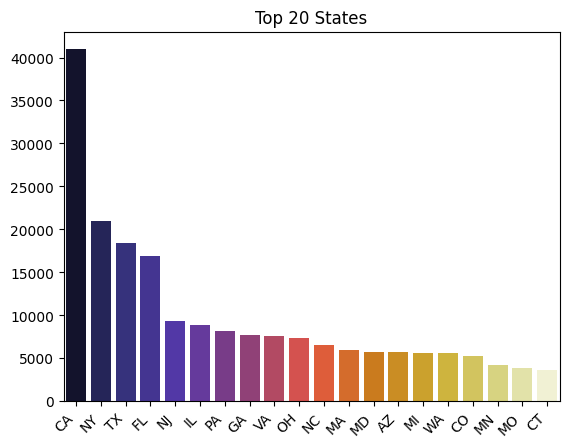

In [ ]:
data_plot  = df['addr_state'].value_counts()[:20].to_list()
label_plot = df['addr_state'].value_counts()[:20].index.to_list()

title = 'Top 20 States'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot_title = plt.title(title)
plt.show()

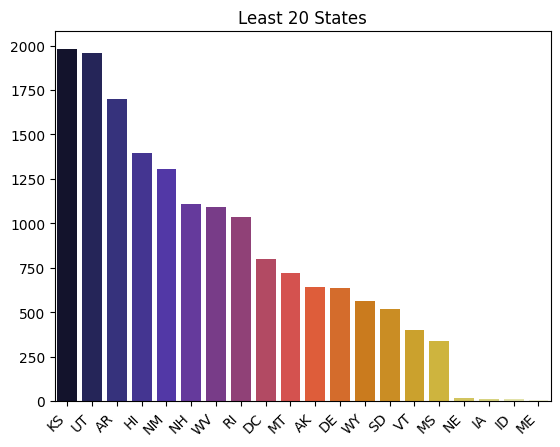

In [ ]:
data_plot  = df['addr_state'].value_counts()[-20:].to_list()
label_plot = df['addr_state'].value_counts()[-20:].index.to_list()

title = 'Least 20 States'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot_title = plt.title(title)
plt.show()

In [ ]:
state_bad_loan_ratio = df.groupby('addr_state')['loan_stats'].value_counts(normalize=True).unstack()
state_bad_loan_ratio['bad_loan_ratio'] = state_bad_loan_ratio[1] / (state_bad_loan_ratio[0] + state_bad_loan_ratio[1])

state_bad_loan_ratio = state_bad_loan_ratio.sort_values(by='bad_loan_ratio', ascending=False)

print(state_bad_loan_ratio)

print("\nTop 5 highest bad loan ratio states:")
print(state_bad_loan_ratio['bad_loan_ratio'].head(5))

print("\nTop 5 lowest bad loan ratio states:")
print(state_bad_loan_ratio['bad_loan_ratio'].tail(5))


loan_stats         0         1  bad_loan_ratio
addr_state                                    
NE          0.428571  0.571429        0.571429
MS          0.687500  0.312500        0.312500
TN          0.709099  0.290901        0.290901
IN          0.730919  0.269081        0.269081
NV          0.750906  0.249094        0.249094
AL          0.761544  0.238456        0.238456
FL          0.764755  0.235245        0.235245
OK          0.769081  0.230919        0.230919
IA          0.769231  0.230769        0.230769
NM          0.771407  0.228593        0.228593
MI          0.772727  0.227273        0.227273
AR          0.772941  0.227059        0.227059
LA          0.773451  0.226549        0.226549
MO          0.774824  0.225176        0.225176
HI          0.775072  0.224928        0.224928
NY          0.775684  0.224316        0.224316
NC          0.777133  0.222867        0.222867
OH          0.777538  0.222462        0.222462
KY          0.778086  0.221914        0.221914
PA          0

* California (CA) takes on the most debt, which can be attributed to its large population and high cost of living. New York (NY), Texas (TX), and Florida (FL) also have high debt, though at lower levels, reflecting regional economic diversity and varying cost pressures. For instance, NY's financial hub and TX's rapid population growth both contribute to higher levels of borrowing.

* States like Nebraska (NE), Iowa (IA), Idaho (ID), and Maine (ME) report the lowest levels of debt, with fewer than 500 accounts in debt. These states' smaller populations, lower living costs, and more conservative attitudes toward debt contribute to less reliance on credit
* The higher default rates in states like Nebraska (NE), Mississippi (MS), Tennessee (TN), Indiana (IN), and Nevada (NV) likely reflect economic challenges such as lower incomes, higher unemployment, or market instability. Nebraska’s particularly high default ratio of 0.57% may be linked to localized issues like industry downturns or agricultural instability.

* States like New Hampshire (NH), Wyoming (WY), and Washington,
D.C. (DC) have low bad loan rates, indicating stronger financial
stability or conservative borrowing habits. Maine (ME) stands out
with no recorded bad loans, possibly due to a low-risk borrower base or effective lending practices, influenced by smaller populations and fewer risky loans.

### Risk Percentage of Bad Loan

In [ ]:
#Risk percentage of bad loan
def risk_percentage(x):
    ratio = (df.groupby(x)['loan_stats']
         .value_counts(normalize=True)
         .mul(100)
         .rename('risk (%)')
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_stats'] == 1], x=x, y='risk (%)')
    plt.xticks(rotation=45, ha='right')
    plt.title(x)
    plt.show()

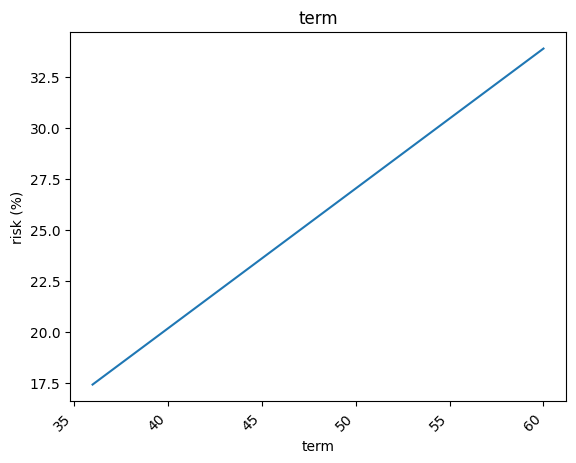

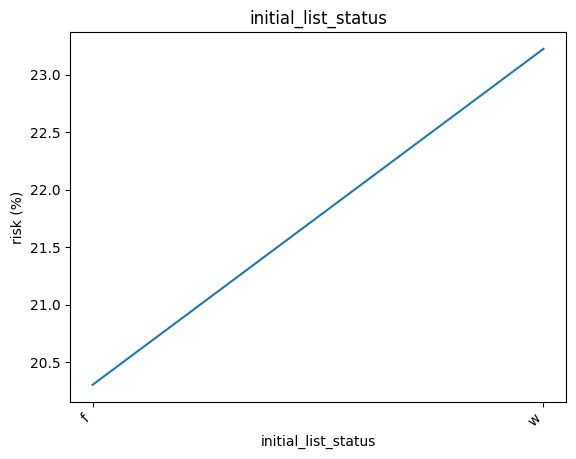

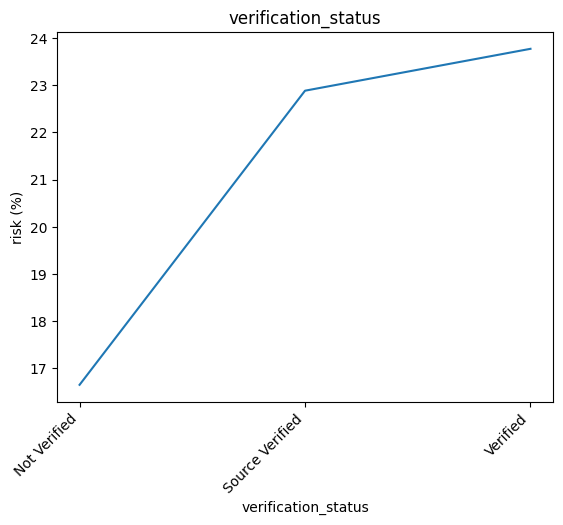

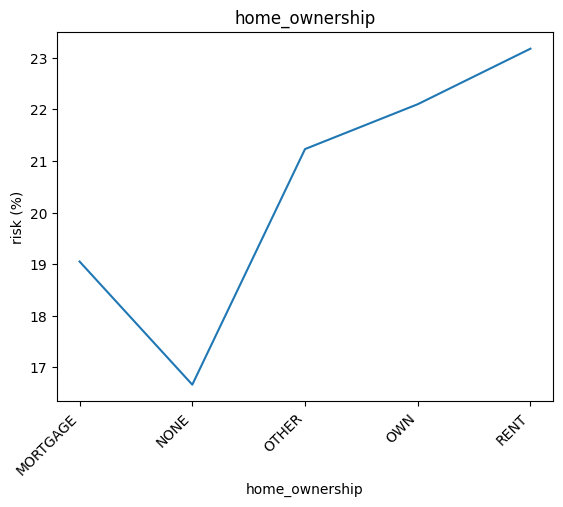

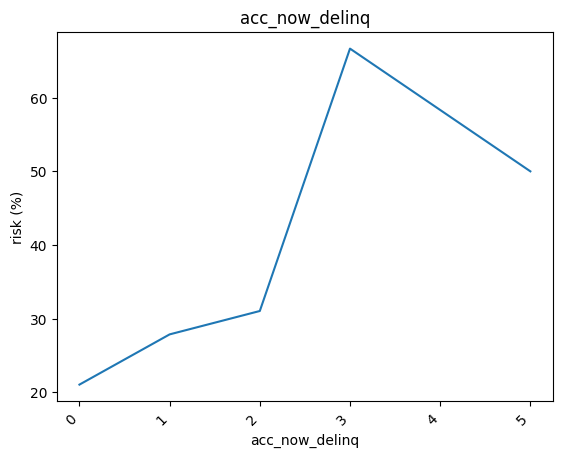

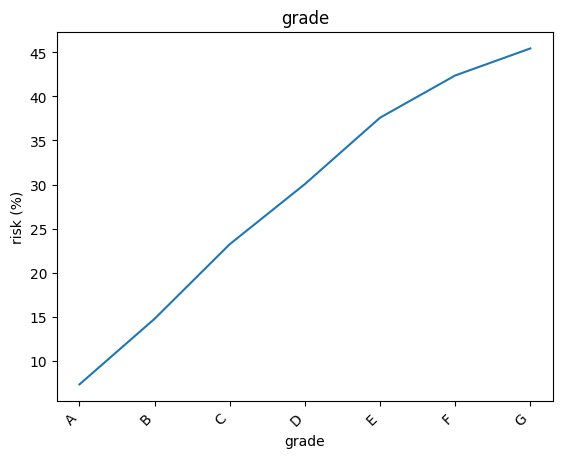

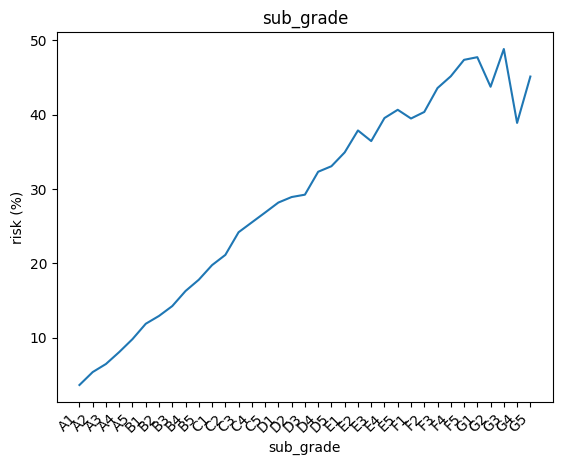

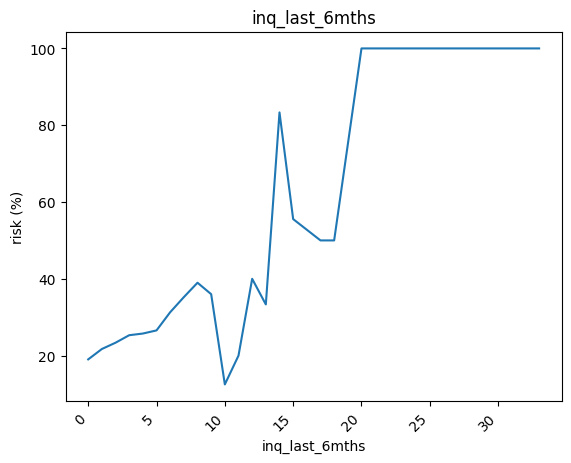

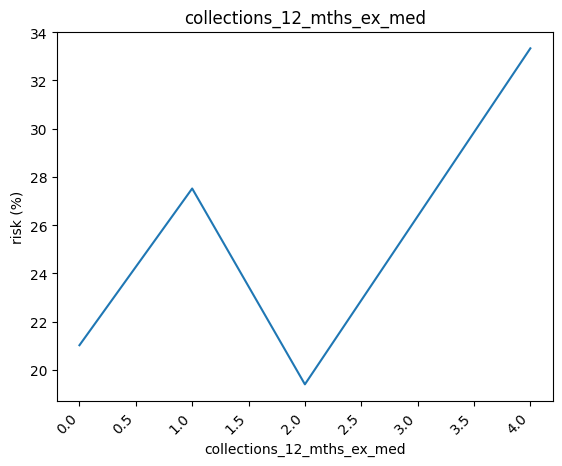

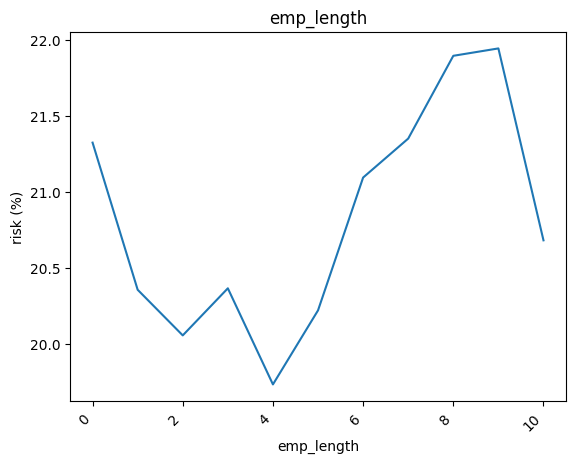

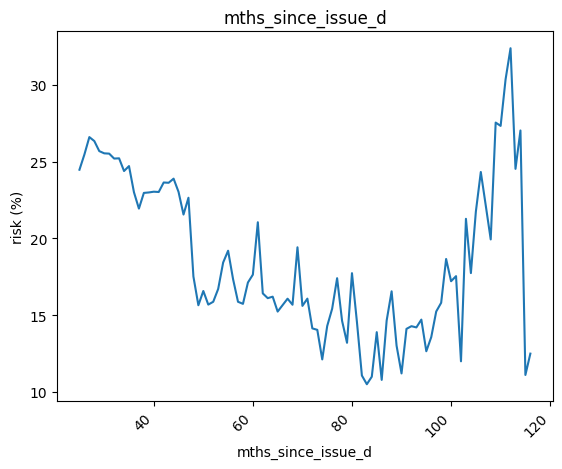

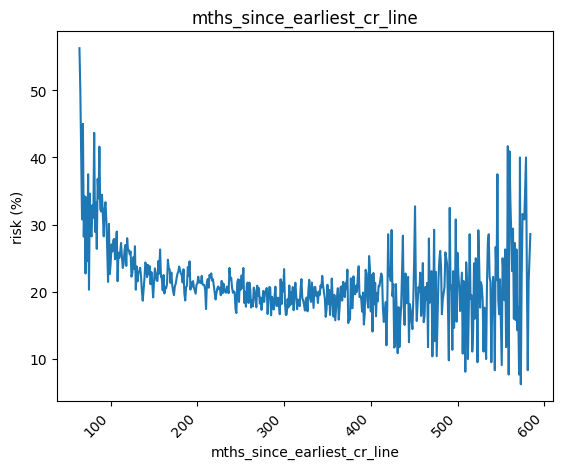

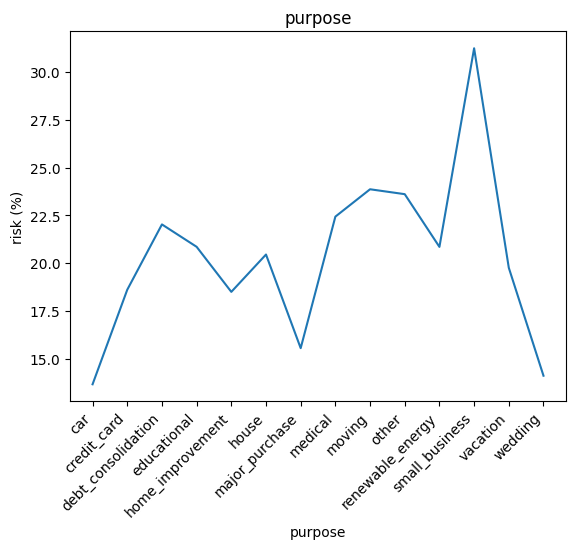

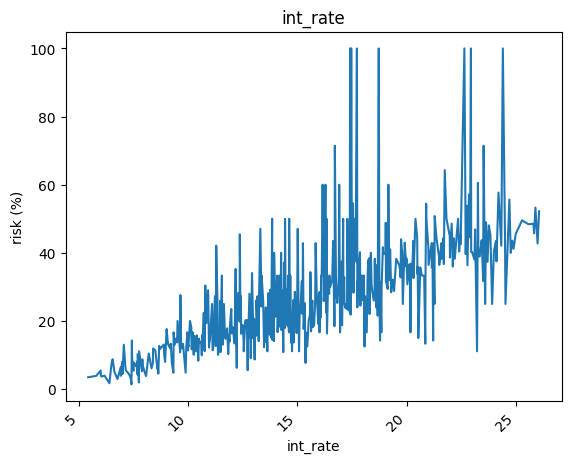

In [ ]:
columns = ['term', 'initial_list_status', 'verification_status', 'home_ownership', 'acc_now_delinq','grade', 'sub_grade', 'inq_last_6mths', 'collections_12_mths_ex_med', 'emp_length', 'mths_since_issue_d', 'mths_since_earliest_cr_line', 'purpose', 'int_rate']
for cols in columns:
    risk_percentage(cols)

* Lower credit grades (e.g., G) are associated with higher default risks. Borrowers in these grades typically have weaker financial standing, as reflected in their credit assessments.
* Longer loan terms, involving more installments, are correlated with a higher likelihood of bad credit. Borrowers may struggle with long-term repayment commitments, especially if financial circumstances change.
* A higher number of delinquent accounts directly increases the likelihood of default. These accounts suggest past financial mismanagement or challenges in meeting financial obligations.
* An increased number of credit checks within the last 6 months is a strong predictor of higher default risk. This behavior often indicates financial distress or a borrower seeking multiple credit lines, potentially signaling overextension.
* Borrowers who own or rent a home show a higher risk for bad loans. This is an interesting finding, especially as borrowers without homes tend to exhibit a lower risk.
* Loans with terms exceeding 100 months show a trend of increasing risk over time. Long-term loans often face more uncertainty, as borrowers' financial circumstances can change significantly over extended periods.
* Loans used for small businesses are the most at risk. Small businesses typically face greater financial volatility. They are more susceptible to market shifts, economic downturns, and cash flow problems, making loans for small businesses inherently riskier.
* Borrowers with a longer borrowing history often demonstrate reliable repayment behavior and build a positive credit track record. However, this isn't always a perfect measure, as other factors like changes in income or economic conditions can still affect risk.
* Debt in the whole (W) market tends to carry slightly higher risk than debt in the fractional (F) market. This may be due to different investor profiles or underwriting standards across these markets.
* Borrowers with more than 2 bills per year (excluding medical bills) face a higher risk of default. This could indicate difficulty in managing day-to-day expenses, leading to financial strain.

* There is a general trend that higher interest rates correlate with increased default risk. Borrowers paying higher rates may already be considered higher risk, thus having a greater likelihood of defaulting.

### Loan Status in Depth

In [ ]:
# Loan status vs grade
pd.crosstab(index=df['loan_stats'], columns=df['grade'])

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,36779,62161,47558,27580,11564,4340,1109
1,2897,10759,14384,11848,6964,3192,924


In [ ]:
# Loan status vs sub-grade
pd.crosstab(index=df['loan_stats'], columns=df['sub_grade'])

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5311,5479,6338,9582,10069,10118,12242,15026,13629,11146,11361,10675,9191,8515,7816,6945,6309,5502,4855,3969,2912,2762,2312,1946,1632,1309,1027,874,640,490,356,279,174,165,135
1,202,313,440,844,1098,1366,1821,2502,2654,2416,2801,2863,2934,2918,2868,2726,2568,2274,2319,1961,1563,1684,1326,1273,1118,854,695,675,527,441,325,217,166,105,111


In [ ]:
# Loan status vs months since issue date
pd.crosstab(index=df['loan_stats'], columns=df['mths_since_issue_d'])

mths_since_issue_d,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1642,4347,7449,2285,4346,7152,4480,5275,5502,5060,4723,5368,5507,5425,5399,5127,5146,4926,4782,4661,4439,4007,3651,4623,4646,4947,4954,4806,4241,3554,2904,2634,2570,2318,2003,2012,1575,1700,1609,1582,1502,1446,1441,1199,1195,1096,1026,1138,1167,1049,1042,982,1003,1045,909,845,811,741,607,570,587,565,504,441,396,353,348,308,284,283,261,228,213,170,101,47,88,111,102,90,196,313,245,221,125,78,71,40,54,56,21
1,532,1485,2699,817,1502,2453,1535,1777,1855,1632,1550,1604,1548,1617,1612,1535,1539,1525,1479,1463,1328,1101,1069,982,862,983,922,907,851,803,690,553,485,433,414,431,420,334,309,306,270,277,268,289,221,210,169,186,161,175,190,207,172,159,196,144,101,87,75,92,71,97,100,66,50,58,58,51,49,41,41,41,40,39,21,10,12,30,22,25,63,89,61,84,47,34,34,13,20,7,3


In [ ]:
# Loan status vs months since earliest credit
pd.crosstab(index=df['loan_stats'], columns=df['mths_since_earliest_cr_line'])

mths_since_earliest_cr_line,62.0,63.0,64.0,65.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,276.0,277.0,278.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,485.0,486.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,1,7,15,9,11,28,25,34,31,43,35,51,51,77,61,53,60,40,59,56,53,79,76,73,109,98,97,87,99,82,92,88,89,128,123,164,194,221,259,222,194,248,254,255,287,290,299,352,368,482,474,422,380,379,415,386,439,479,512,515,618,745,673,537,522,549,529,535,480,560,580,643,753,801,679,605,569,512,538,555,531,612,668,791,961,912,759,714,690,696,665,694,580,673,796,935,1088,1121,922,925,740,747,724,745,686,759,918,1029,130

In [ ]:
# Loan status vs home ownership
pd.crosstab(index=df['loan_stats'], columns=df['home_ownership'])

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_stats,,,,,,
0,1,96197,40,141,15917,78795
1,0,22640,8,38,4515,23767


In [ ]:
# Loan status vs income verification (amount and source verification)
pd.crosstab(index=df['loan_stats'], columns=df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_stats,,,
0,69846,52620,68625
1,13946,15617,21405


In [ ]:
# Loan status, loan amount, and grade
pd.pivot_table(df, values='loan_amnt', index='loan_stats', columns='grade', aggfunc=np.mean)

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,12148.124609,12343.340680,13232.306342,13946.722263,17123.724490,18482.620968,20327.254283
1,12161.520538,12563.370202,13686.239919,14666.521776,17679.200172,19072.932331,20498.538961


In [ ]:
# Loan status, annual income, and grade
pd.pivot_table(df, values='annual_inc', index='loan_stats', columns='grade', aggfunc=np.mean)

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,79161.655939,71886.931332,71160.443073,71333.372768,77673.799868,80197.316820,93441.470667
1,67561.592054,63675.745411,63143.778140,64179.295047,69351.350902,71360.196087,82080.278820


In [ ]:
# Loan status, revolving balance, and grade
pd.pivot_table(df, values='revol_bal', index='loan_stats', columns='grade', aggfunc=np.mean)

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,15011.325403,15081.987178,14969.181505,15243.415555,16872.074542,16923.059908,21575.368801
1,14807.946496,14612.173622,14781.833635,14841.688893,16273.146611,16755.600251,18005.908009


In [ ]:
# Loan amount vs home ownership
pd.pivot_table(df, values='loan_amnt', index='loan_stats', columns='home_ownership', aggfunc=np.mean)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_stats,,,,,,
0,5000.0,14750.036903,12570.625,10419.680851,12522.677012,11531.054001
1,NaN,16593.950972,12643.750,11564.473684,13660.415282,12877.856902


In [ ]:
# Loan status vs purpose
pd.crosstab(index=df['loan_stats'], columns=df['purpose'])

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_stats,,,,,,,,,,,,,,
0,3040,39284,109992,334,11479,1237,5099,2130,1458,10578,205,3330,1190,1735
1,481,8981,31069,88,2605,318,939,616,457,3269,54,1513,293,285


* Borrowers with mortgages or rental statuses are more likely to take out loans. Mortgage holders may be using debt to manage high financial obligations, while renters might face less stable financial situations.

* Individuals with lower credit grades often carry higher revolving balances, indicating a greater reliance on loans and an increased likelihood of carrying unpaid debt month to month. This behavior suggests higher financial risk, as larger revolving balances can lead to greater interest accrual and potential
difficulty in managing debt.
* Borrowers in lower credit grades tend to take on larger debts, further increasing their risk of default. This trend suggests that lower creditworthiness does not always curb loan sizes, potentially exacerbating risk.

* Borrowers with bad loans typically have lower average annual incomes, reflecting a strong link between income and credit risk. Lower-income individuals may struggle more to meet debt obligations, leading to higher default rates.

### Visualization

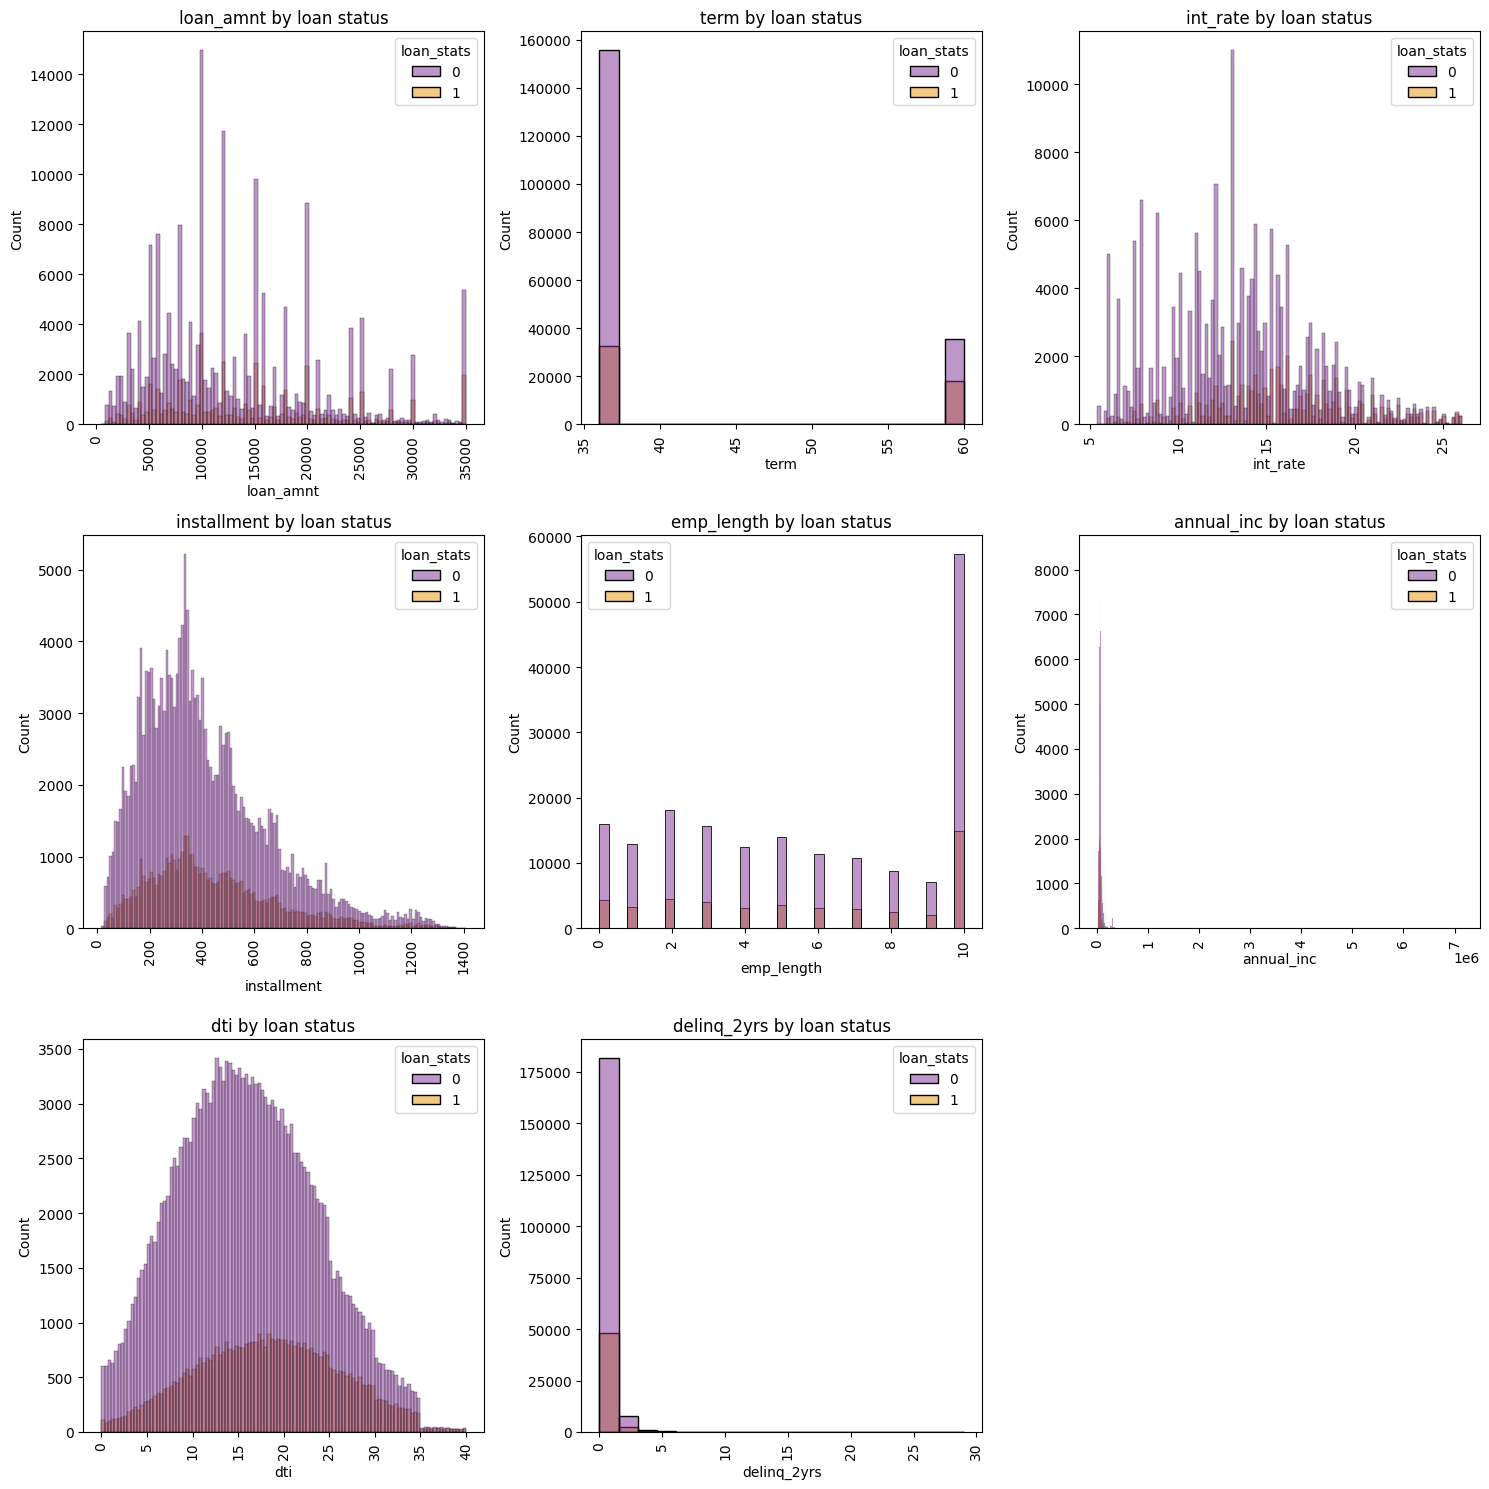

In [ ]:
column_name_list_num = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs']
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Histplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'loan_stats', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by loan status")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

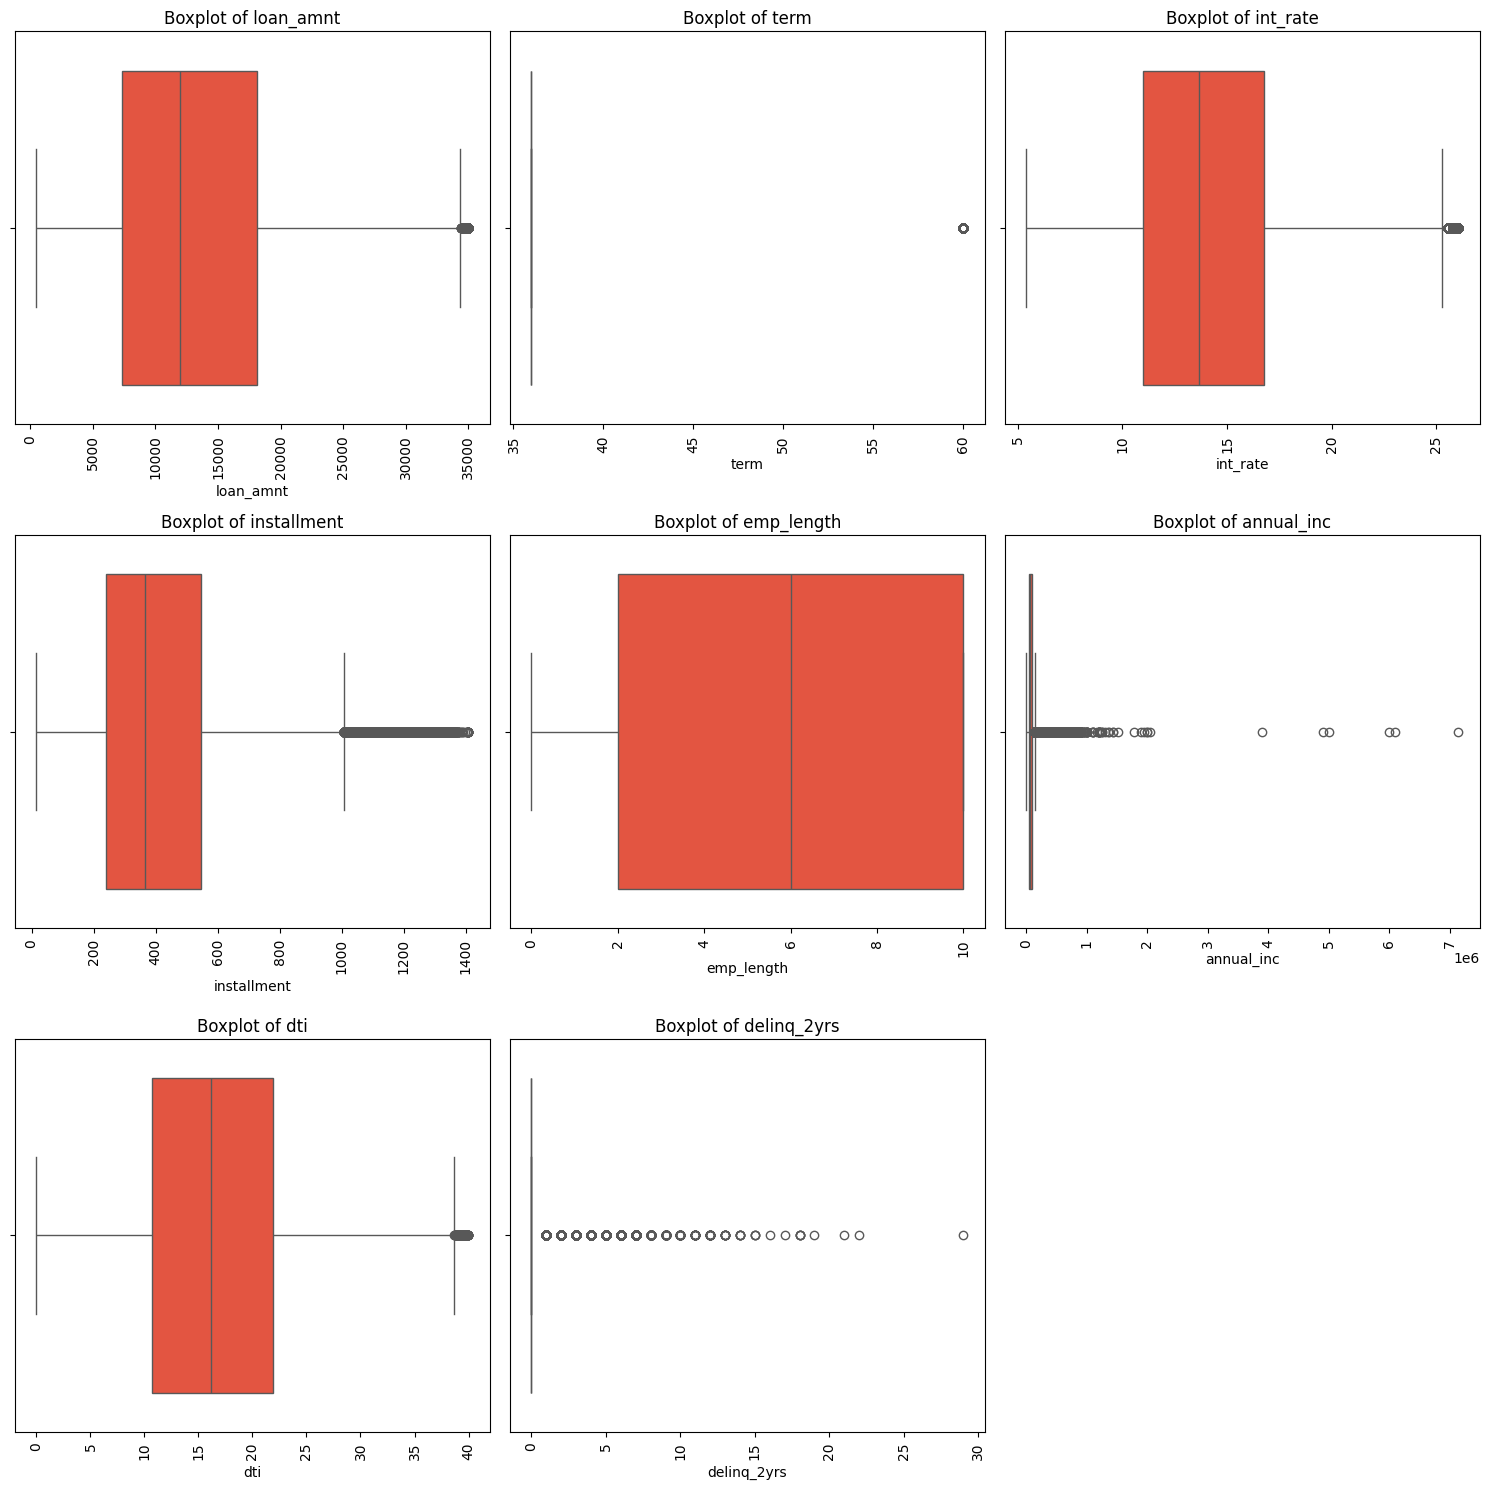

In [ ]:
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

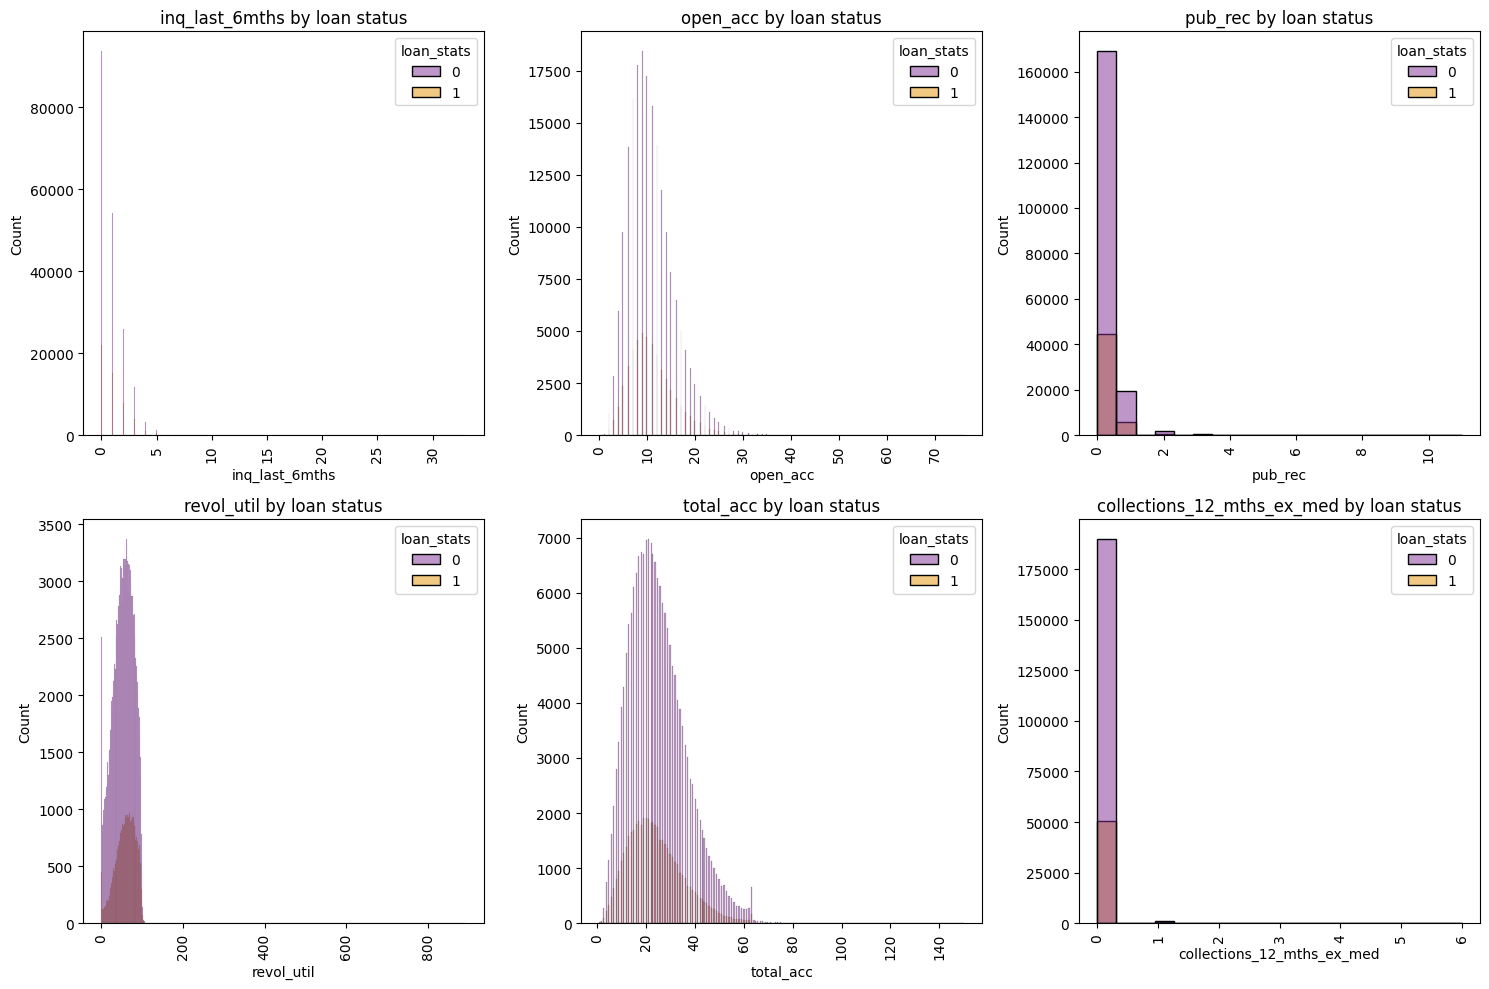

In [ ]:
column_name_list_num = ['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med']
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Histplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'loan_stats', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by loan status")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

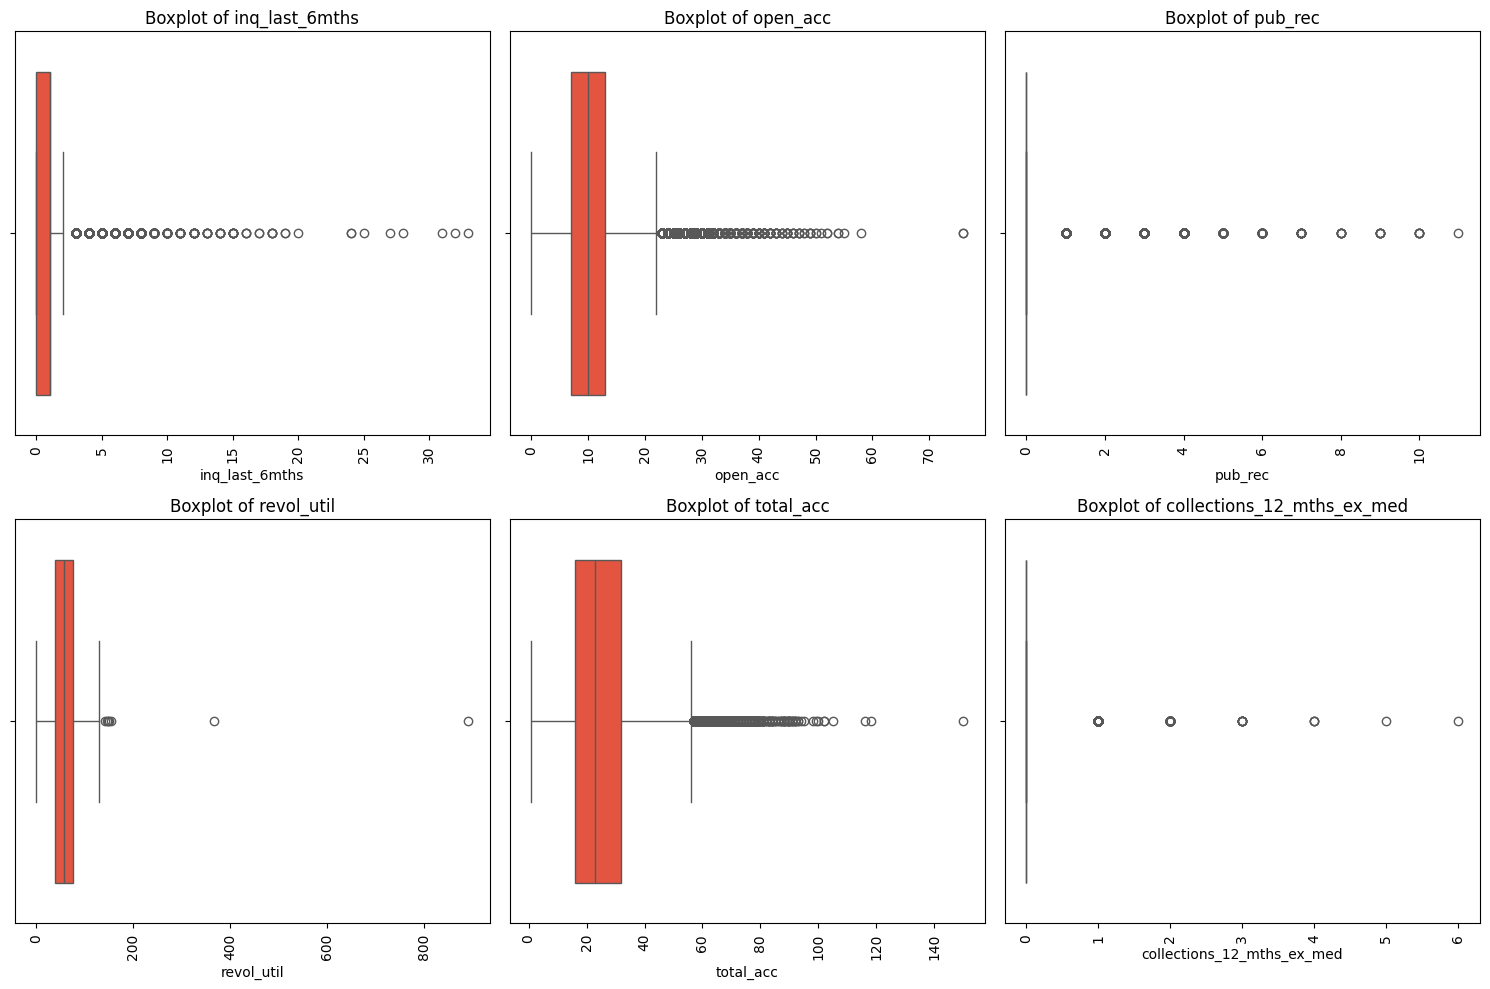

In [ ]:
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

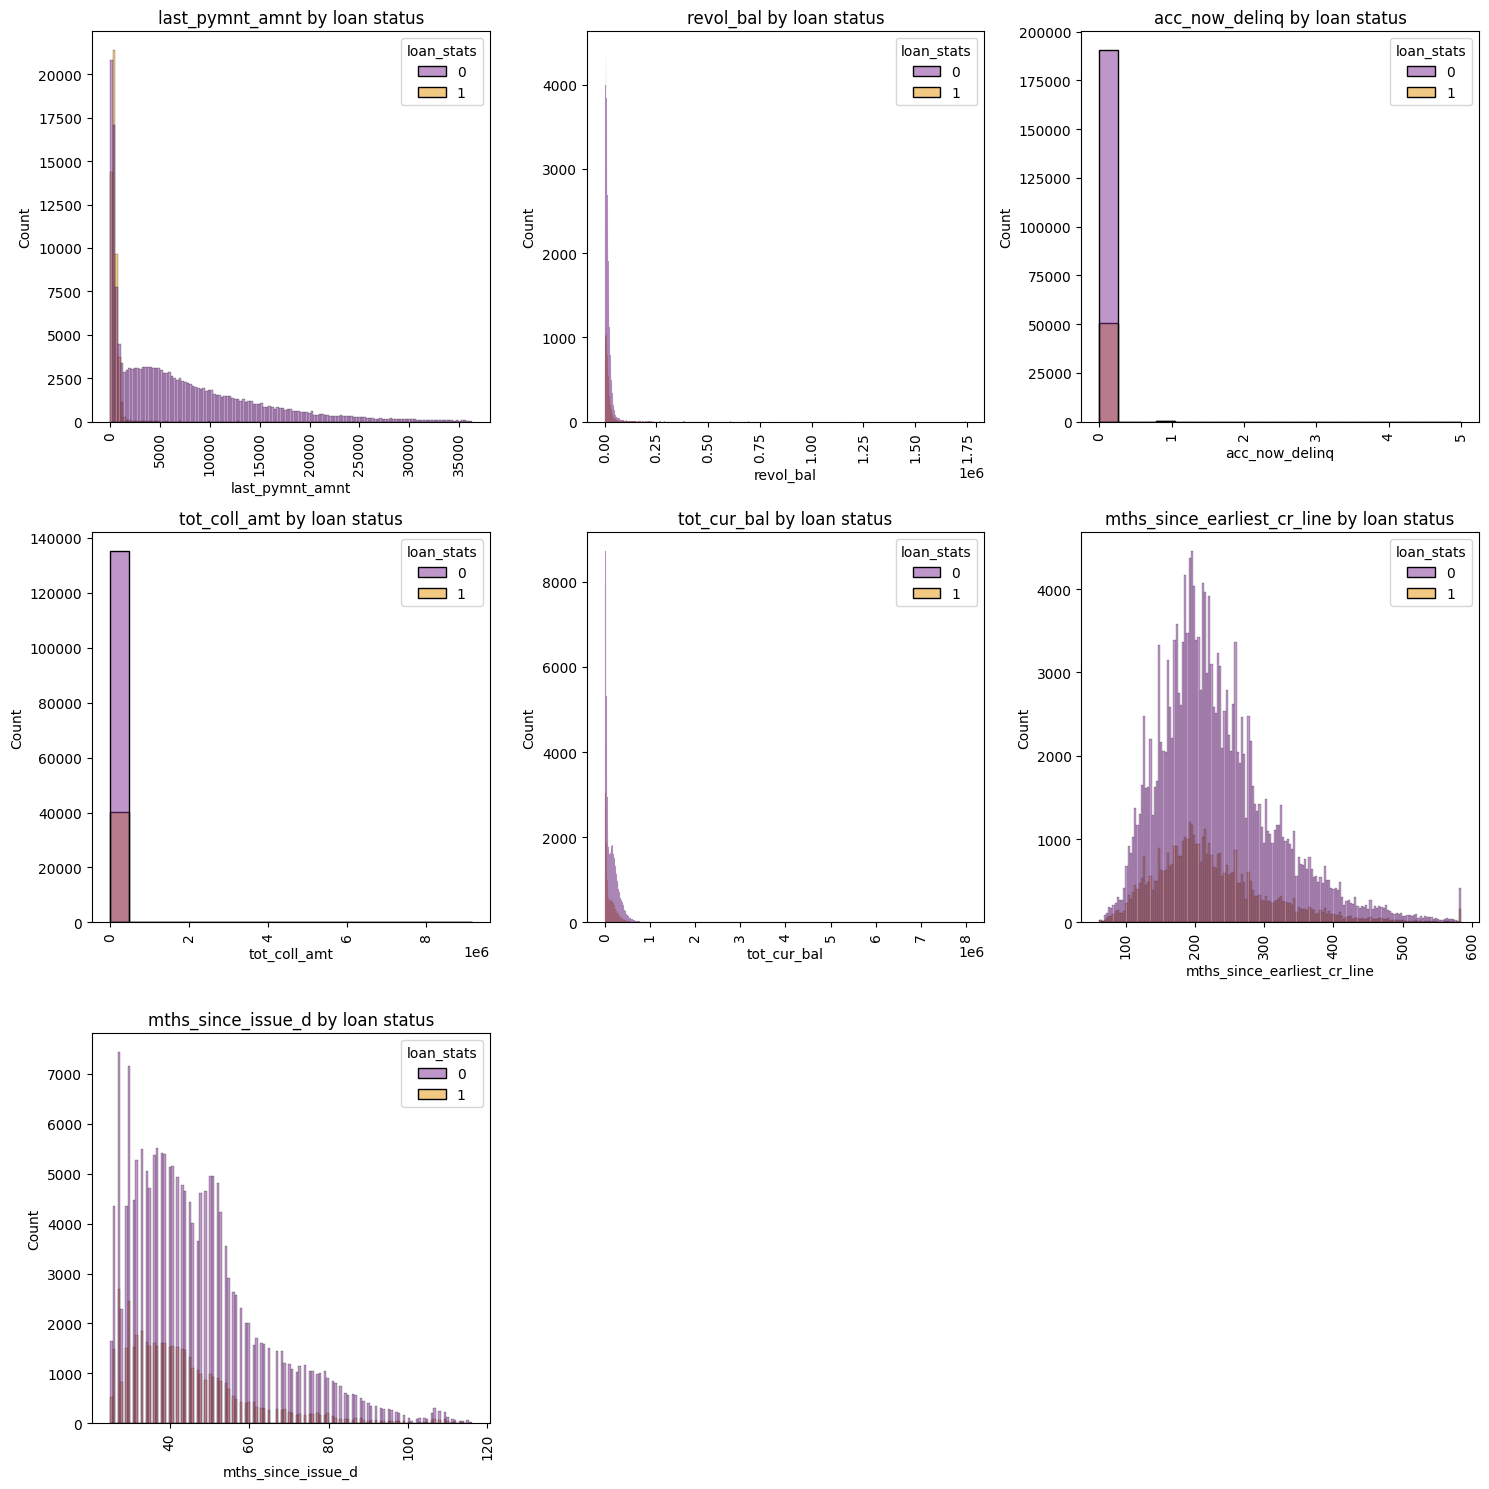

In [ ]:
column_name_list_num = ['last_pymnt_amnt', 'revol_bal', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_earliest_cr_line', 'mths_since_issue_d']
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Histplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'loan_stats', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by loan status")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

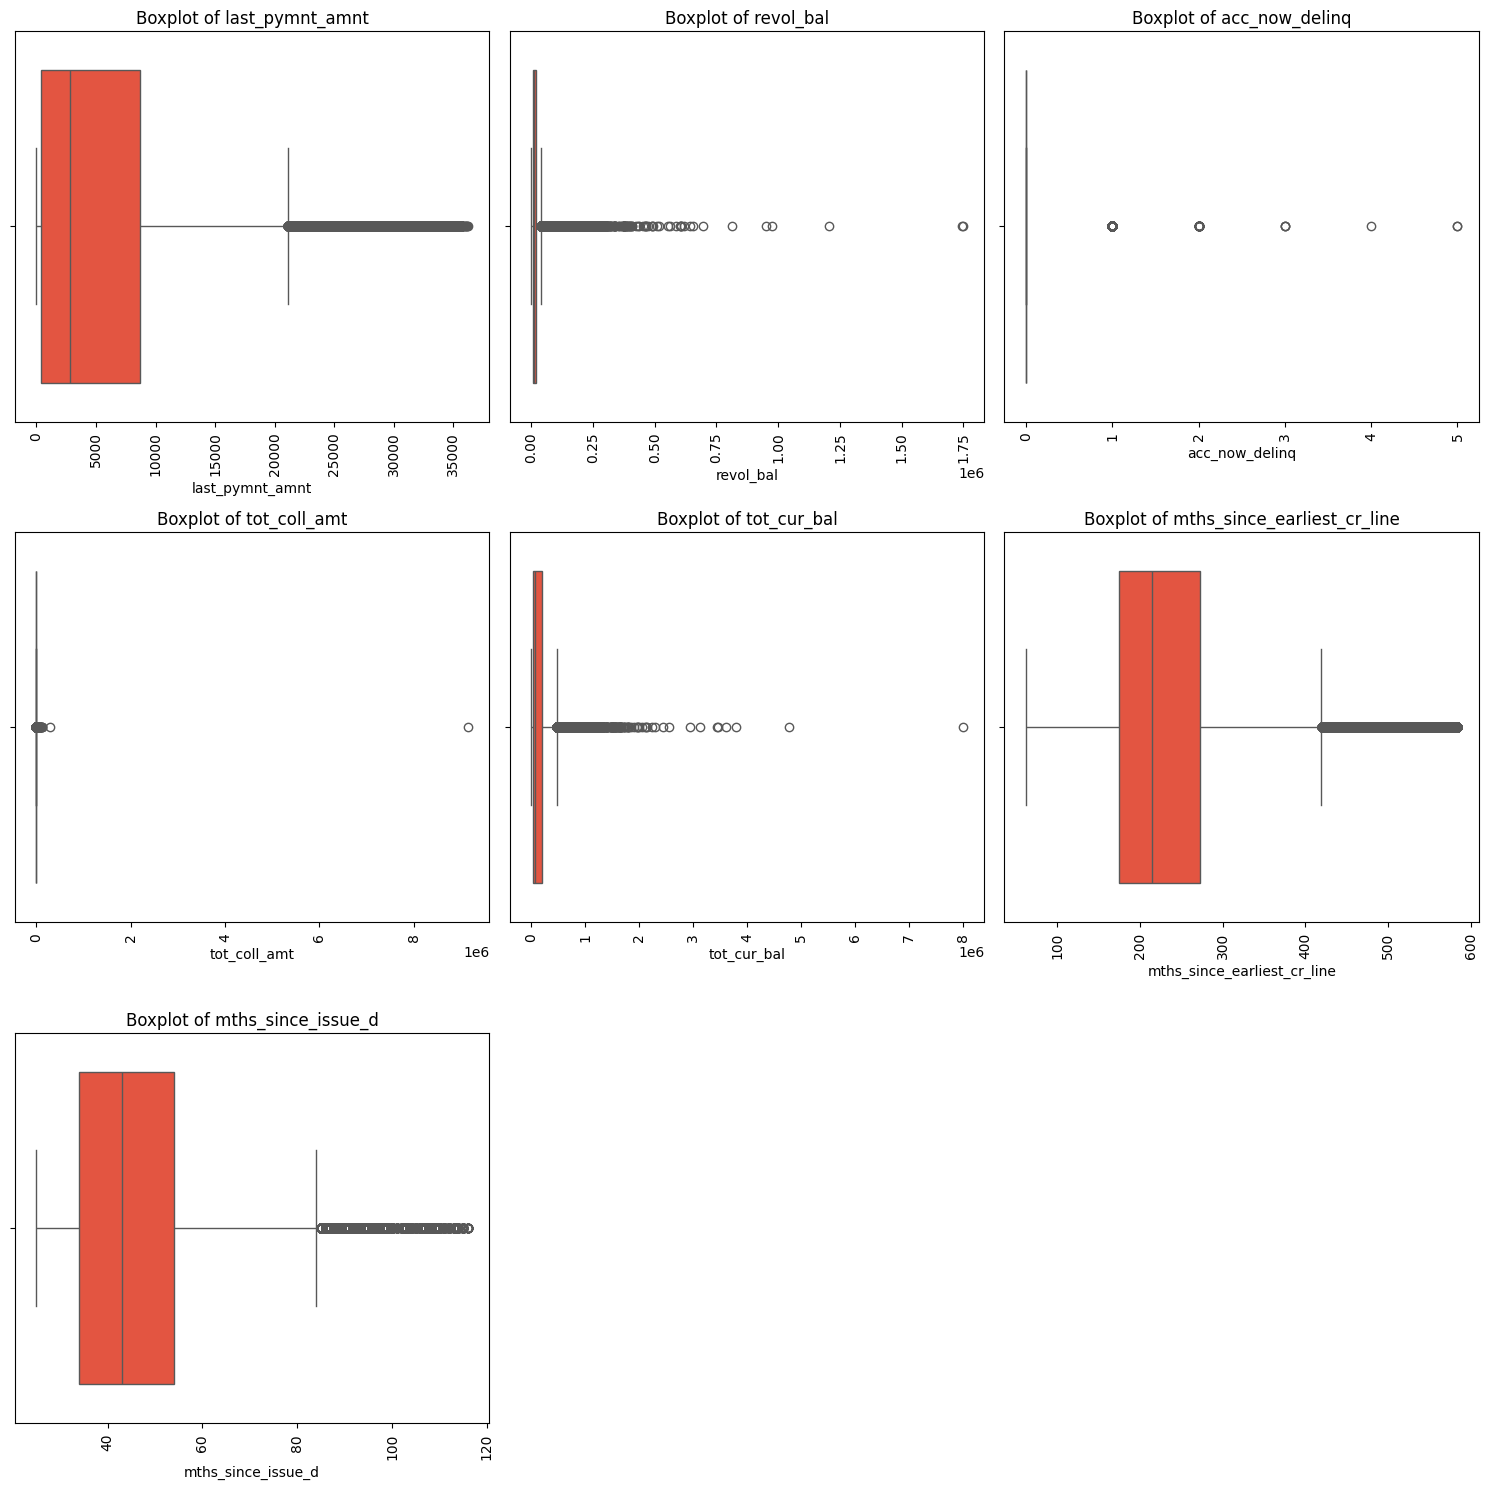

In [ ]:
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

##Missing Data Imputation

In [ ]:
#Removing unnecessary data
dropped = ['emp_length', 'emp_title', 'mths_since_issue_d', 'sub_grade', 'issue_d', 'issue_year']
df.drop(columns = dropped, axis=1, inplace=True)

emp_title and emp_length are excluded due to too many unique values and limited relevance to credit risk. Sub-grade is dropped in favor of grade, which simplifies the model by reducing category complexity. Also, columns like mths_since_issue_d and issue_year are removed because they contain data unavailable at the time of loan approval.

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
home_ownership,0
annual_inc,4
verification_status,0
purpose,0
addr_state,0


In [ ]:
# Drop null values
df.dropna(inplace=True)

In [ ]:
# Changing data type because the value is in whole number, not decimals
df['open_acc'] = df['open_acc'].astype(int)
df['pub_rec'] = df['pub_rec'].astype(int)
df['total_acc'] = df['total_acc'].astype(int)
df['acc_now_delinq'] = df['acc_now_delinq'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175256 entries, 40575 to 242058
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    175256 non-null  int64  
 1   term                         175256 non-null  float64
 2   int_rate                     175256 non-null  float64
 3   installment                  175256 non-null  float64
 4   grade                        175256 non-null  object 
 5   home_ownership               175256 non-null  object 
 6   annual_inc                   175256 non-null  float64
 7   verification_status          175256 non-null  object 
 8   purpose                      175256 non-null  object 
 9   addr_state                   175256 non-null  object 
 10  dti                          175256 non-null  float64
 11  delinq_2yrs                  175256 non-null  float64
 12  inq_last_6mths               175256 non-null  float64
 13  

## Feature Correlation

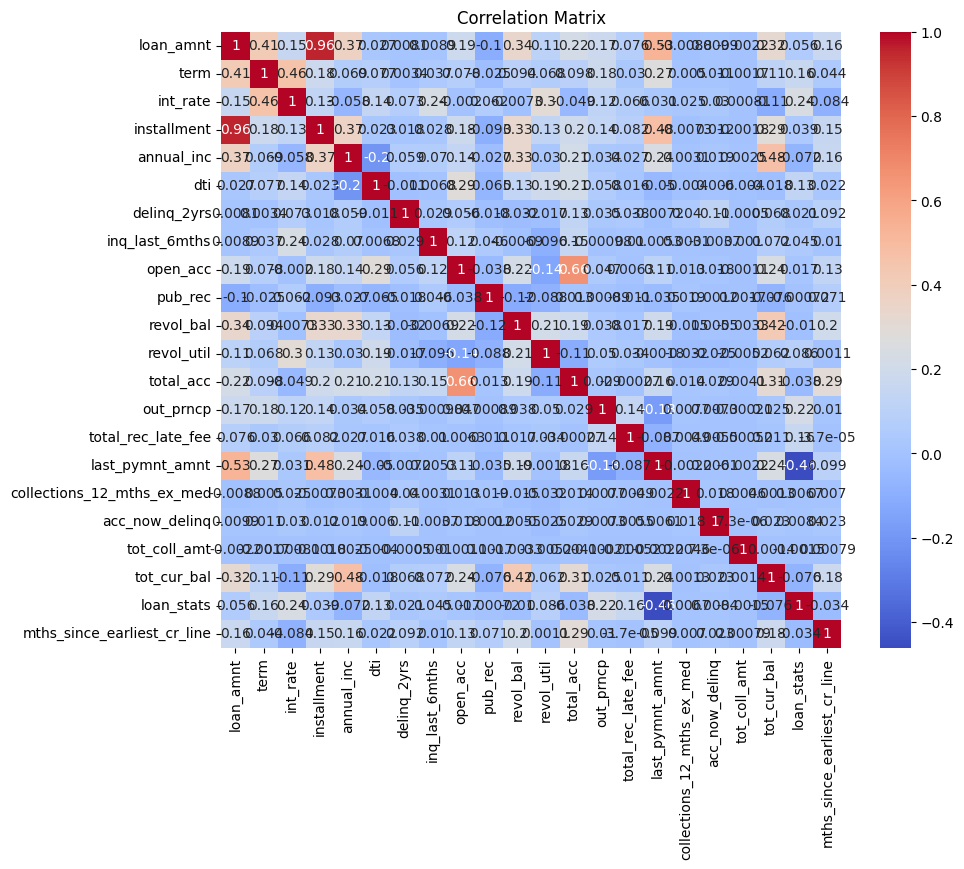

In [ ]:
# Select only int and float columns
df_corr = df.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Find columns with correlation above 0.7
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

# Drop the highly correlated columns
df.drop(to_drop, axis=1, inplace=True)

['installment']


## Outliers

In [ ]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional
       whiskers, removing rows for which the column value are
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5

    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

In [ ]:
outlier = ['annual_inc', 'last_pymnt_amnt','tot_coll_amt','tot_cur_bal']

In [ ]:
print(f'Count of rows before removing outlier: {len(df)}')
for i in outlier:
  df = subset_by_iqr(df, i)
print(f'Count of rows after removing outlier: {len(df)}')

Count of rows before removing outlier: 175256
Count of rows after removing outlier: 141002


## One-Hot Encoding

In [ ]:
# Categorical data
cat = df.select_dtypes (include= ['object'])
cat

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,B,MORTGAGE,Not Verified,debt_consolidation,CO,f
1,C,RENT,Not Verified,debt_consolidation,NY,f
2,B,MORTGAGE,Source Verified,home_improvement,TX,w
3,B,RENT,Verified,debt_consolidation,NY,f
4,B,MORTGAGE,Not Verified,debt_consolidation,PA,w
...,...,...,...,...,...,...
140997,C,RENT,Verified,credit_card,CA,f
140998,D,MORTGAGE,Verified,medical,MA,f
140999,A,RENT,Verified,debt_consolidation,MD,f
141000,D,RENT,Source Verified,vacation,VA,f


In [ ]:
# One-hot encoding for categorical features
cat_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

## Splitting the dataset into the Training set and Test set

In [ ]:
#Defining x and y
x = df.drop(columns=['loan_stats'], axis = 1)
y = df['loan_stats']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##Balancing data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight={0: 1, 1: 10})

In [ ]:
#Training the model
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10})

In [ ]:
#Predict testing set
y_pred = rf.predict(x_test)

In [ ]:
print('Training-set accuracy score:', rf.score(x_train, y_train))
print('Test-set accuracy score:', rf.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9012800964504805


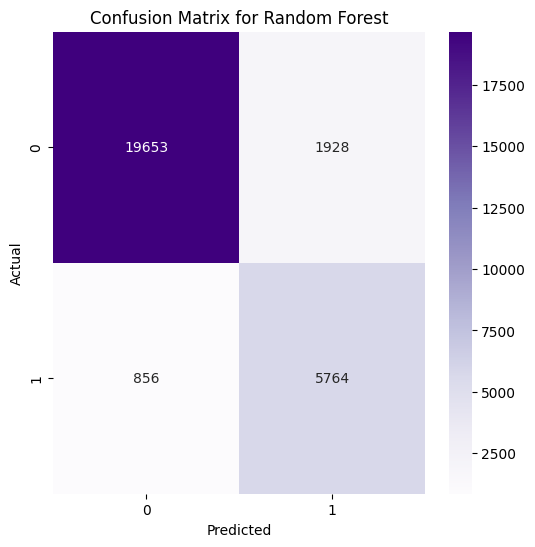

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     21581
           1       0.75      0.87      0.81      6620

    accuracy                           0.90     28201
   macro avg       0.85      0.89      0.87     28201
weighted avg       0.91      0.90      0.90     28201



In [ ]:
#Check model performance using auc score
roc_auc_score(y_test, y_pred)*100

89.06785102874564

The model performs well in detecting bad loans, even with imbalanced data. The model's AUC score reaches 89%, indicating strong predictive performance and reliability in identifying high risk loans.

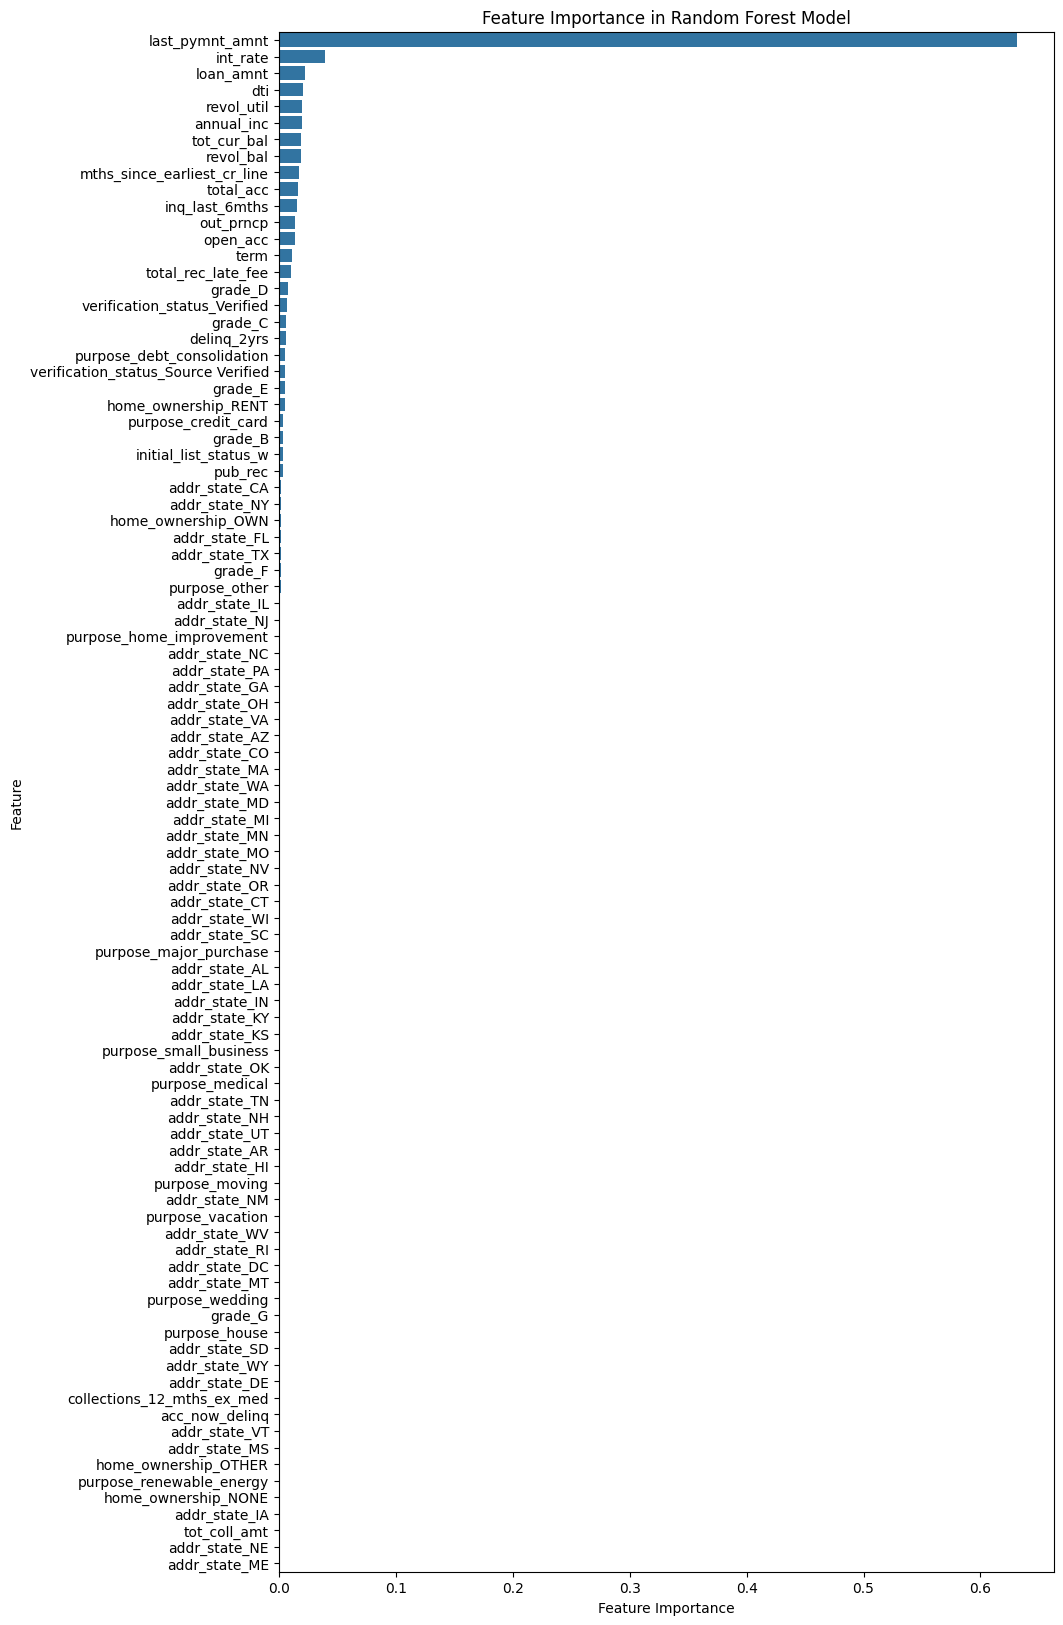

In [ ]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 20))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()


The chart above illustrates the feature importance, highlighting how each factor contributes to the Random Forest model's ability to predict credit risk. The most significant feature is last_pymnt_amnt, indicating that the last payment amount plays a key role in determining credit risk. Int_rate (interest rate) is also a critical feature. It's important to note that the chart excludes categorical features, which have already been one-hot encoded.